## Dijkstra's algorithm

In [88]:
#!pip install requests
#!pip install pandas
#!pip install networkx

In [89]:
import requests
import math
import time
import json
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt

In [90]:
def round_math(value, decimals=2):
    if value is None:
        return None
    factor = 10 ** decimals
    if value >= 0:
        return math.floor(value * factor + 0.5) / factor
    else:
        return math.ceil(value * factor - 0.5) / factor

def nodo_name(n: int) -> str:
    rows = [
        "1a Calle Poniente",
        "2a Calle Poniente",
        "3a Calle Poniente",
        "4a Calle Poniente",
        "5a Calle Poniente",
        "6a Calle Poniente",
        "7a Calle Poniente"
    ]

    columns = [
        ("Alameda Santa Lucia", "Calzada Santa Lucia Sur"),
        "7a Avenida Norte",
        "6a Avenida Norte",
        "5a Avenida Norte",
        "4a Avenida Norte",
        "3a Avenida Norte",
        "2a Avenida Norte",
        "1a Avenida Norte"
    ]

    row_index = math.floor(n / 8)
    col_index = n % 8

    col = columns[col_index]
    if isinstance(col, tuple):
        if row_index < 4:
            col = col[0]
        else:
            col = col[1]
    return rows[row_index], col

def distance(tuple1, tuple2):
    return round_math(math.sqrt((tuple2[0] - tuple1[0])**2 + (tuple2[1] - tuple1[1])**2))


### Coordinates of the intersections of the chosen area (Antigua Guatemala)

In [91]:
coordinates = [(14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.53, -90.74), (14.56, -90.74), (14.53, -90.74), (14.53, -90.74), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.33, -91.03), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73)]

### Add edges

In [92]:
col_rules = ["both", "desc", "asc", "desc", "asc", "desc", "asc", "desc"]
row_rules = ["both", "asc", "desc", "asc", "desc", "both", "asc"]

map_graph = nx.DiGraph()
for node in range(8*7):
    map_graph.add_node(node)

for row in range(7-1):
    for col in range(8):

        # Add column edges with weight
        current_node = row*8 + col
        down_node = (row+1)*8 + col
        weight = distance(coordinates[current_node], coordinates[down_node])
        
        if col_rules[col] == "both":
            map_graph.add_edge(current_node, down_node, weight=weight)
            map_graph.add_edge(down_node, current_node, weight=weight)
        elif col_rules[col] == "asc":
            map_graph.add_edge(current_node, down_node, weight=weight)
        elif col_rules[col] == "desc":
            map_graph.add_edge(down_node, current_node, weight=weight)

for row in range(7):
    for col in range(8-1):
        
        # Add row edges with weight
        current_node = row*8 + col
        right_node = row*8 + (col+1)
        weight = distance(coordinates[current_node], coordinates[right_node])
        
        if row_rules[row] == "both":
            map_graph.add_edge(current_node, right_node, weight=weight)
            map_graph.add_edge(right_node, current_node, weight=weight)
        elif row_rules[row] == "asc":
            map_graph.add_edge(current_node, right_node, weight=weight)
        elif row_rules[row] == "desc":
            map_graph.add_edge(right_node, current_node, weight=weight)

#print(map_graph.nodes[0])

### Show map

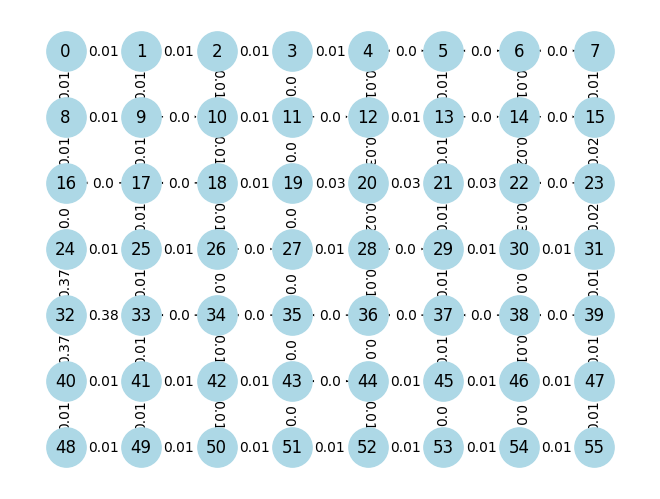

In [93]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)
        
nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
edge_labels = nx.get_edge_attributes(map_graph, 'weight')
nx.draw_networkx_edge_labels(map_graph, pos, edge_labels=edge_labels)
plt.show()

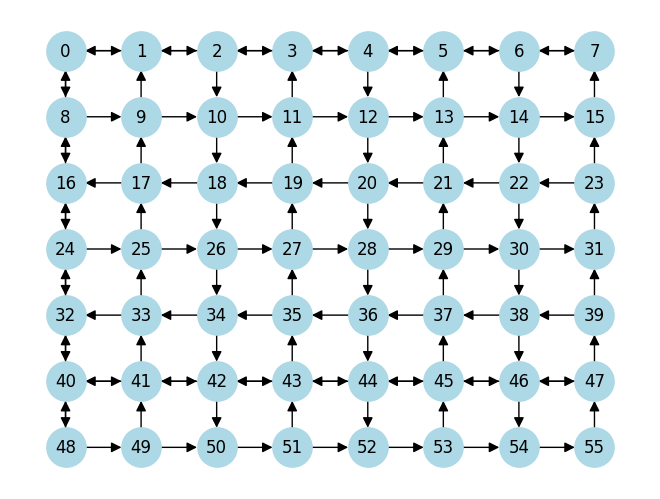

In [94]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)
        
nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
plt.show()